# Python Quiz

## q1. download dataset from **https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who** and perform regression analysis with:
1. Linear Regression
2. Random Forest Regression
3. Polynomial Regression
4. Ridge Regression
5. Logistic Regression

Plot the accuracies.

## q2. download dataset from **https://www.kaggle.com/datasets/rabieelkharoua/asthma-disease-dataset** and perform classification using:
1. Logistic Regression
2. Decision Trees
3. Support Vector Machines (SVM)
4. Random Forest
5. Naive Bayes Classifier

Plot the accuracies.


       Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.

c:\Users\mites\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.43935e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


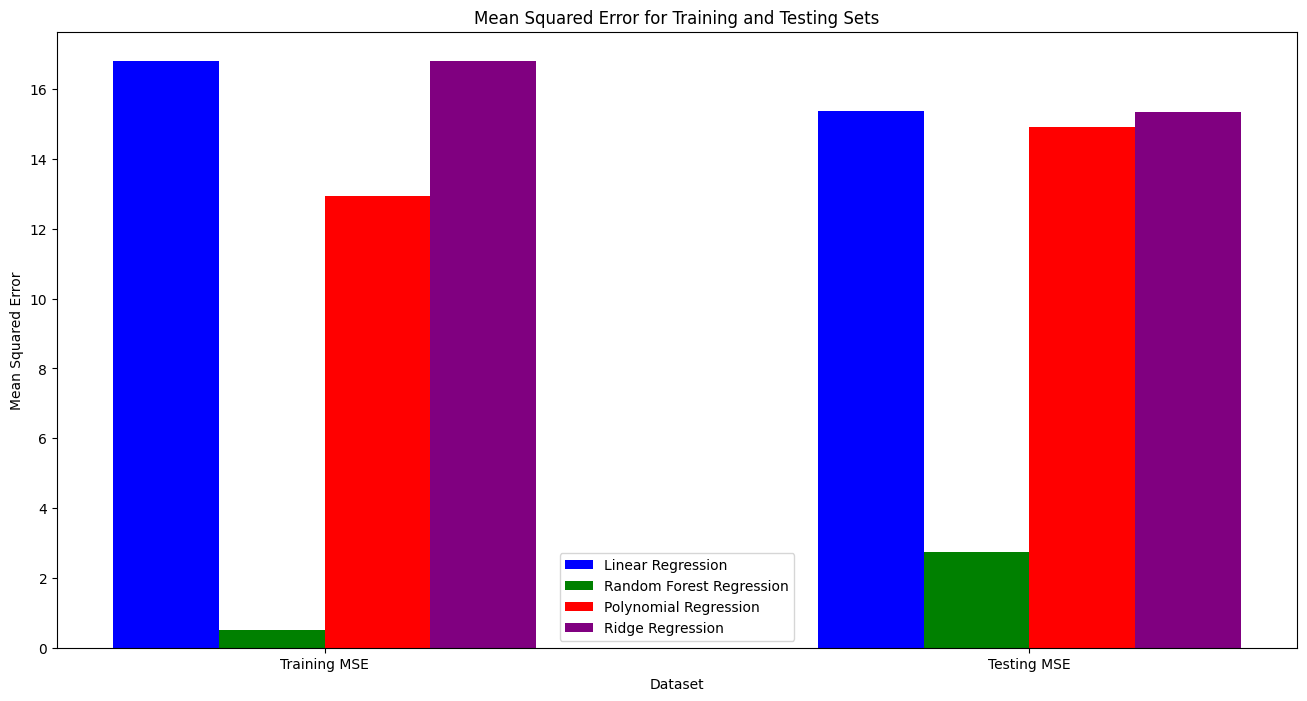

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, accuracy_score

# Load dataset
# Update this to your actual file path
file_path = 'C:\\Users\\mites\\OneDrive\\Desktop\\archive\\Life Expectancy Data.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())

# Check for any missing values
print(data.isnull().sum())

# Define features and target variable
features = data.drop(columns=['Life expectancy ', 'Country', 'Year', 'Status'])
target = data['Life expectancy ']

# Handle missing values (if any)
features = features.fillna(features.mean())
target = target.fillna(target.mean())

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, random_state=42)

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

y_pred_train_lr = linear_model.predict(X_train)
y_pred_test_lr = linear_model.predict(X_test)

mse_train_lr = mean_squared_error(y_train, y_pred_train_lr)
mse_test_lr = mean_squared_error(y_test, y_pred_test_lr)

print(f'Linear Regression - Training MSE: {mse_train_lr}')
print(f'Linear Regression - Testing MSE: {mse_test_lr}')

# Random Forest Regression
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

y_pred_train_rf = random_forest_model.predict(X_train)
y_pred_test_rf = random_forest_model.predict(X_test)

mse_train_rf = mean_squared_error(y_train, y_pred_train_rf)
mse_test_rf = mean_squared_error(y_test, y_pred_test_rf)

print(f'Random Forest Regression - Training MSE: {mse_train_rf}')
print(f'Random Forest Regression - Testing MSE: {mse_test_rf}')

# Polynomial Regression
degree = 2  # You can change the degree to any value you need
polynomial_model = make_pipeline(
    PolynomialFeatures(degree), LinearRegression())
polynomial_model.fit(X_train, y_train)

y_pred_train_poly = polynomial_model.predict(X_train)
y_pred_test_poly = polynomial_model.predict(X_test)

mse_train_poly = mean_squared_error(y_train, y_pred_train_poly)
mse_test_poly = mean_squared_error(y_test, y_pred_test_poly)

print(
    f'Polynomial Regression (degree {degree}) - Training MSE: {mse_train_poly}')
print(
    f'Polynomial Regression (degree {degree}) - Testing MSE: {mse_test_poly}')

# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

y_pred_train_ridge = ridge_model.predict(X_train)
y_pred_test_ridge = ridge_model.predict(X_test)

mse_train_ridge = mean_squared_error(y_train, y_pred_train_ridge)
mse_test_ridge = mean_squared_error(y_test, y_pred_test_ridge)

print(f'Ridge Regression - Training MSE: {mse_train_ridge}')
print(f'Ridge Regression - Testing MSE: {mse_test_ridge}')

# Plotting the results
plt.figure(figsize=(16, 8))
bar_width = 0.15

# Bar positions
index = range(2)

# Bar heights
linear_mses = [mse_train_lr, mse_test_lr]
random_forest_mses = [mse_train_rf, mse_test_rf]
polynomial_mses = [mse_train_poly, mse_test_poly]
ridge_mses = [mse_train_ridge, mse_test_ridge]

# Plot bars
bar1 = plt.bar(index, linear_mses, bar_width,
               label='Linear Regression', color='blue')
bar2 = plt.bar([p + bar_width for p in index], random_forest_mses,
               bar_width, label='Random Forest Regression', color='green')
bar3 = plt.bar([p + 2 * bar_width for p in index], polynomial_mses,
               bar_width, label='Polynomial Regression', color='red')
bar4 = plt.bar([p + 3 * bar_width for p in index], ridge_mses,
               bar_width, label='Ridge Regression', color='purple')

# Add labels, title, and legend
plt.xlabel('Dataset')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error for Training and Testing Sets')
plt.xticks([p + 1.5 * bar_width for p in index],
           ['Training MSE', 'Testing MSE'])
plt.legend()

# Show plot
plt.show()


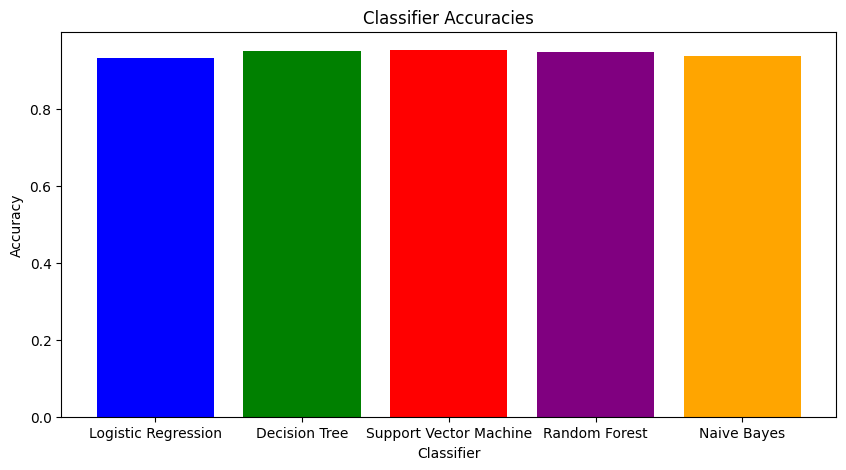

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv(
    'C:\\Users\\mites\\OneDrive\\Desktop\\archive\\asthma_disease_data.csv')

# Preprocessing
# Assuming 'Diagnosis' is the target variable and rest are features
X = data.drop(['Diagnosis'], axis=1)
y = data['Diagnosis']

# Convert categorical columns to numerical using one-hot encoding
X = pd.get_dummies(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Standardize the features (important for SVM)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize classifiers
logistic_regression = LogisticRegression(max_iter=10000)
decision_tree = DecisionTreeClassifier()
svm = SVC()
random_forest = RandomForestClassifier()
naive_bayes = GaussianNB()

# Train and evaluate classifiers
classifiers = {
    'Logistic Regression': logistic_regression,
    'Decision Tree': decision_tree,
    'Support Vector Machine': svm,
    'Random Forest': random_forest,
    'Naive Bayes': naive_bayes
}

accuracies = {}

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracies[name] = accuracy_score(y_test, y_pred)

# Plot accuracies
plt.figure(figsize=(10, 5))
plt.bar(accuracies.keys(), accuracies.values(), color=[
        'blue', 'green', 'red', 'purple', 'orange'])
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Classifier Accuracies')
plt.show()
